<a href="https://colab.research.google.com/github/prahlad37/ml-hackathon/blob/main/qbuzz_prob_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal:** Given a wide range of numerical attributes that are collected after processing thousands of articles and news, you have to build a machine learning model that will estimate the number of shares.

In [97]:
import pandas as pd


#Use to import the file into google Colab drive
from google.colab import files

#uploaded = files.upload()

data = pd.read_excel('training_data.xlsx')

Data reading complete.

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [99]:
sample_sz, num_ft = data.shape

print('sample size     : ' + str(sample_sz))
print('num of features : ' + str(num_ft))

data['shares'].describe(percentiles=[.25, .5, .75, 0.9])

sample size     : 28786
num of features : 61


count     28786.000000
mean       3428.658549
std       12693.940388
min           1.000000
25%         940.250000
50%        1400.000000
75%        2800.000000
90%        6200.000000
max      843300.000000
Name: shares, dtype: float64

Process the data frame

In [100]:
import numpy as np

# remove extra spaces from columns
data.columns = data.columns.str.strip()
# drop weekend
data = data.drop(columns=['Weekend'], errors='ignore')
# combine all days to single column
day_list = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
sdf_day = data[day_list.keys()]
data['which_day'] = sdf_day.mul(np.array((1, 2, 3, 4, 5, 6, 7)),axis=1).sum(axis=1)
data = data.drop(columns=day_list.keys(), errors='ignore')

data.shape

(28786, 54)

Category

In [113]:
# combine all days to single column
cat_list = {'Lifestyle':1, 'Entertainment':2, 'Business':3, 'SocialMedia':4, 'Technology':5, 'World':6}
sdf_cat = data[cat_list.keys()]
data['category'] = sdf_cat.mul(cat_list.values(),axis=1).sum(axis=1)
data = data.drop(columns=cat_list.keys(), errors='ignore')

data.shape

(28786, 49)

filtered 2901 samples


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


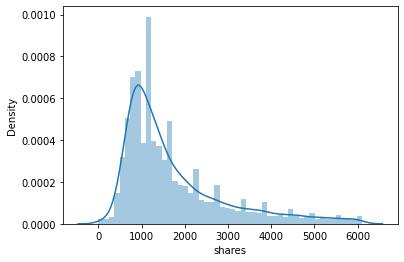

In [101]:
# filter top 10% samples
data_filtered = data[data['shares'] < 6200 ]
filt_sample_sz, x = data_filtered.shape

# print number of samples that are dropped.
print('filtered '+ str(sample_sz- filt_sample_sz) + ' samples')

sns.distplot(data_filtered.shares)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


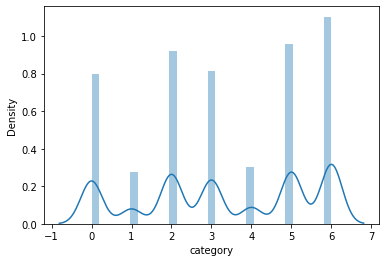

In [114]:
#col_list = data_filtered.sample(n=4, axis='columns').columns.tolist()
col_list = ['which_day']
col_list.append('shares')
df_for_plot = data_filtered[col_list]

#df_for_plot.plot.scatter(x=['which_day'],y=['shares']);
sns.distplot(df_for_plot.which_day)
#print(df_for_plot[df_for_plot['which_day'] == 3])
#sns.pairplot(df_for_plot, x_vars=col_list, y_vars=['shares'], size = 2, aspect = 1.5)